In [46]:
import sys
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tsfresh as tf
import xgboost as xgb

sys.path.append('../bin')
from bin.functions import *
np.seterr(divide = 'ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
input_file = "../src/M4-methods/Dataset/Train/Monthly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_m = pd.read_csv(output_file, index_col=0)
df_m

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V2786,V2787,V2788,V2789,V2790,V2791,V2792,V2793,V2794,V2795
V1,,,,,,,,,,,,,,,,,,,,,
M1,8000.0,8350.0,8570.0,7700.0,7080.0,6520.0,6070.0,6650.0,6830.0,5710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M2,2440.0,2490.0,2710.0,2290.0,1960.0,1990.0,1960.0,2530.0,2640.0,2650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M3,2670.0,2590.0,2784.0,2816.0,2888.0,2906.0,2839.0,2860.0,2798.0,2795.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M4,7264.0,7215.0,7022.0,7040.0,6966.0,6984.0,7025.0,7082.0,6956.0,7014.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M5,4210.0,4290.0,4250.0,4320.0,4320.0,4330.0,4320.0,4260.0,4220.0,4260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M47996,9964.0,7212.0,7858.0,8493.0,8203.0,8362.0,7238.0,7357.0,8642.0,8833.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M47997,1696.6,1627.2,1465.4,1672.8,1760.1,1974.8,1733.7,1898.0,1952.4,1684.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M47998,5900.0,6000.0,6280.0,6100.0,5410.0,5320.0,5130.0,5330.0,5810.0,5840.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_m.reset_index(inplace=True)

melted_df = pd.melt(df_m, id_vars='V1', var_name='time', value_name='value')

melted_df.rename(columns={'V1': 'id'}, inplace=True)

result_df = melted_df[['value', 'id', 'time']]

In [22]:
result_df = result_df.dropna(subset=['value'])

In [23]:
extracted_features = tf.extract_features(result_df, column_value="value", column_id="id", column_sort="time")
extracted_features

Feature Extraction: 100%|██████████| 30/30 [18:19<00:00, 36.63s/it]


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
M1,1.0,0.0,0.0,1.0,2957630.0,2.015209e+10,830.854701,2.393162,-0.471092,6040.00,...,0.204871,0.314393,1.527958,1.731562,2.984286,4.324268,5.408633,5.937456,NaN,12345.714286
M10,1.0,0.0,0.0,1.0,3567860.0,3.795868e+10,1375.041096,-18.931507,8.090659,8490.00,...,0.455046,0.680383,1.766841,1.628800,2.744244,3.839040,4.677345,5.185173,NaN,17578.571429
M100,1.0,0.0,0.0,1.0,480725.7,8.707210e+08,149.735395,0.531271,-0.272759,1828.05,...,0.200814,0.337797,1.262954,1.671086,2.818106,3.923709,4.656849,5.044218,NaN,2355.357143
M1000,1.0,0.0,0.0,1.0,876160.0,3.217971e+09,629.513678,-7.386018,2.301829,2610.00,...,0.090729,0.090729,0.565525,1.789365,3.141912,4.557639,5.462218,5.732063,NaN,7898.571429
M10000,1.0,0.0,0.0,1.0,243270.0,9.612367e+08,560.441176,-12.205882,5.597015,3000.00,...,0.258641,0.545869,2.321181,1.669409,2.770460,3.476079,3.772762,3.927383,NaN,5965.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9995,1.0,0.0,0.0,1.0,289980.0,1.376324e+09,603.529412,0.000000,-5.895522,3430.00,...,0.258641,0.659665,2.167908,1.680721,2.853158,3.634488,3.985596,4.077121,NaN,6687.142857
M9996,1.0,0.0,0.0,1.0,125750.0,2.832275e+08,435.735294,1.323529,0.522388,1460.00,...,0.606869,0.987758,2.539705,1.734685,2.849939,3.579620,3.912438,4.055116,NaN,3524.285714
M9997,1.0,0.0,0.0,1.0,119560.0,2.285024e+08,246.470588,-5.588235,0.522388,1530.00,...,0.386675,0.827889,2.360790,1.629158,2.630247,3.492798,3.925923,4.099125,NaN,2697.142857
M9998,1.0,0.0,0.0,1.0,184420.0,5.821544e+08,452.647059,-11.764706,6.194030,2660.00,...,0.258641,0.474208,2.111743,1.673554,2.818938,3.547837,3.898953,4.055116,NaN,4675.714286


In [24]:
df_res = pd.read_csv("all_result.csv", index_col=0)
df_res

,V1,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4,smape,mase,max_diff,amplitude,mean,variance,adf_test_pvalue,kpss_test_pvalue
0,Y1,0.697843,0.539401,4993.838193,0.009190,False,-0.000000,0.009146,0.600416,232.30,2566.80,6523.738710,7.535744e+05,0.113077,0.010000
1,Y2,0.816579,0.705971,12899.948420,0.084814,False,-0.000000,0.088896,0.552155,599.00,1533.00,1346.387097,1.432428e+05,0.110802,0.096658
2,Y3,0.000000,0.000000,3476.611770,0.005390,False,-0.000000,0.005387,0.254877,320.00,5620.00,5595.806452,2.732452e+06,0.951878,0.010000
3,Y4,0.166740,0.144179,16100.535285,0.010972,False,-0.000000,0.010918,0.510635,440.00,6290.00,6599.032258,3.248222e+06,0.988328,0.010000
4,Y5,0.478736,0.395644,10617.608987,0.010394,False,-0.000000,0.010289,0.436703,590.00,4860.00,4012.580645,1.727553e+06,0.997930,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,D4223,NaN,0.907049,33883.253502,0.051424,True,0.175517,0.052152,3.794788,86.00,7097.00,3312.858131,1.695250e+05,0.000000,0.062011
4223,D4224,NaN,0.933608,1112.812688,0.007694,True,0.572596,0.007734,0.500734,195.00,6417.00,4104.727642,1.772440e+05,0.000000,0.100000
4224,D4225,NaN,0.910326,1858.370496,0.007457,False,0.552355,0.007506,0.022866,238.00,348148.00,5449.449057,4.566552e+08,0.497741,0.100000
4225,D4226,NaN,0.946536,27.140520,0.003027,True,0.666145,0.003028,0.340748,282.71,3823.38,1606.119072,8.195809e+05,0.515162,0.010000


In [28]:
y = df_res.loc[df_res["V1"].str.startswith('M')]
y.index = y["V1"]
y = y.drop("V1", axis = 1)

In [36]:
y = y.reindex(extracted_features.index)
y

,perm_ent3,perm_ent4,mse,mape,sym_test,w_perm_ent4,smape,mase,max_diff,amplitude,mean,variance,adf_test_pvalue,kpss_test_pvalue
M1,NaN,0.909662,510387.163828,0.107616,False,0.653887,0.111216,0.795965,3960.0,10800.0,6306.247335,3.206288e+06,0.079292,0.043154
M10,NaN,0.776543,46974.230979,0.028888,False,0.104103,0.029328,0.258974,2480.0,11120.0,9748.251366,8.707618e+06,0.032905,0.010000
M100,NaN,0.813075,229.341783,0.005872,False,0.423125,0.005859,0.159110,77.3,1416.7,1646.320890,2.724819e+05,0.173487,0.010000
M1000,NaN,0.981528,18472.099838,0.106100,True,0.676940,0.104290,0.171441,4680.0,10180.0,2655.030303,2.710454e+06,0.539563,0.010000
M10000,NaN,0.789068,169394.452115,0.163731,True,0.564776,0.143061,0.358594,1260.0,5250.0,3525.652174,1.522813e+06,0.535928,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9995,NaN,0.862429,24254.212275,0.079222,True,0.431544,0.075880,0.143356,880.0,4930.0,4202.608696,2.318411e+06,0.842172,0.010000
M9996,NaN,0.814624,21891.550628,0.143694,True,0.313809,0.136540,0.243727,540.0,2980.0,1822.463768,7.948924e+05,0.304572,0.010000
M9997,NaN,0.795462,11506.190667,0.065637,True,0.466083,0.068929,0.194415,380.0,1930.0,1732.753623,3.137408e+05,0.733069,0.010000
M9998,NaN,0.855461,7972.585589,0.063205,True,0.675522,0.062365,0.081271,800.0,4150.0,2672.753623,1.312429e+06,0.877345,0.010000


In [38]:
extracted_features.dropna(axis=1, inplace=True)

In [39]:
feature_relevance = tf.feature_selection.relevance.calculate_relevance_table(extracted_features, y["smape"], ml_task='regression')

In [40]:
feature_relevance

,feature,type,p_value,relevant
feature,,,,
value__sum_values,value__sum_values,real,0.0,True
"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_T...",real,0.0,True
"value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_Tr...",real,0.0,True
"value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_Fa...",real,0.0,True
"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_T...",real,0.0,True
...,...,...,...,...
value__number_crossing_m__m_0,value__number_crossing_m__m_0,constant,NaN,False
value__number_crossing_m__m_-1,value__number_crossing_m__m_-1,constant,NaN,False
value__number_crossing_m__m_1,value__number_crossing_m__m_1,constant,NaN,False


In [41]:
feature_relevance.feature

feature
value__sum_values                                                                                    value__sum_values
value__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.2    value__change_quantiles__f_agg_"mean"__isabs_T...
value__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2     value__change_quantiles__f_agg_"var"__isabs_Tr...
value__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.2    value__change_quantiles__f_agg_"var"__isabs_Fa...
value__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.2    value__change_quantiles__f_agg_"mean"__isabs_T...
                                                                                           ...                        
value__number_crossing_m__m_0                                                            value__number_crossing_m__m_0
value__number_crossing_m__m_-1                                                          value__number_crossing_m__m_-1
value__number_crossing_m__m_1           

In [42]:
feature = feature_relevance[~feature_relevance.feature.str.contains('entropy')]

In [44]:
feature = feature[feature["relevant"] == True]

In [45]:
feature

,feature,type,p_value,relevant
feature,,,,
value__sum_values,value__sum_values,real,0.000000,True
"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_T...",real,0.000000,True
"value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_Tr...",real,0.000000,True
"value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_Fa...",real,0.000000,True
"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_T...",real,0.000000,True
...,...,...,...,...
"value__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)",value__cwt_coefficients__coeff_14__w_2__widths...,real,0.000777,True
"value__linear_trend__attr_""intercept""","value__linear_trend__attr_""intercept""",real,0.001239,True
value__c3__lag_2,value__c3__lag_2,real,0.003461,True


In [66]:
param_ts = extracted_features[feature.feature]

In [67]:
param_ts

,value__sum_values,"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4",...,value__ratio_value_number_to_time_series_length,"value__fft_coefficient__attr_""real""__coeff_21",value__quantile__q_0.6,value__percentage_of_reoccurring_values_to_all_values,"value__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)","value__linear_trend__attr_""intercept""",value__c3__lag_2,value__energy_ratio_by_chunks__num_segments_10__segment_focus_2,"value__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""mean"""
M1,2957630.0,410.336134,92196.525669,6.284248e+05,613.584071,252026.534967,1.245466e+06,826.831395,5.621455e+05,113253.027682,...,0.675906,10253.753968,6516.00,0.324921,6446.791391,1751.613790,5051.521390,2.905267e+11,0.101200,5062.683539
M10,3567860.0,72.635659,2607.006790,3.518413e+04,97.989691,26694.412265,8.730481e+06,1328.798587,6.971386e+06,9080.957336,...,0.721311,-7432.533493,8970.00,0.276515,9437.201896,-539.326273,8369.903218,1.019862e+12,0.079032,8396.036757
M100,480725.7,14.538144,359.433287,4.849553e+02,15.538255,293.026657,6.878272e+03,21.215049,6.428238e+03,278.889579,...,0.979452,-14.507522,2009.46,0.020979,742.863085,0.479242,1968.217703,5.392683e+09,0.145176,1967.345898
M1000,876160.0,345.050505,110536.108560,4.195952e+05,458.095238,209815.419501,1.052168e+06,655.640000,6.224646e+05,46411.428571,...,0.715152,-485.371458,3004.00,0.309322,2739.532248,-517.162587,3933.281333,3.717925e+10,0.281350,3916.919041
M10000,243270.0,118.500000,7922.750000,4.087384e+05,355.294118,287001.384083,8.165102e+05,508.979592,5.581112e+05,8725.000000,...,0.869565,-4870.752969,3378.00,0.133333,3963.449340,-436.405900,4883.080745,5.275118e+10,0.106578,4765.657143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9995,289980.0,179.090909,25744.628099,5.351665e+05,362.647059,428413.581315,7.761402e+05,496.000000,5.428480e+05,65955.555556,...,0.855072,-1786.204160,4734.00,0.118644,5672.141061,-106.731086,6051.850932,8.915067e+10,0.142009,5886.285714
M9996,125750.0,92.272727,6490.289256,1.157416e+05,180.606061,88151.147842,5.189738e+05,365.200000,3.861410e+05,1881.632653,...,0.811594,-2288.695884,1714.00,0.178571,2937.816558,64.873656,2444.625259,7.084457e+09,0.088846,2367.771429
M9997,119560.0,79.473684,4604.986150,8.226553e+04,164.687500,58706.152344,1.684150e+05,242.857143,1.102286e+05,2460.937500,...,0.855072,-672.232453,1856.00,0.135593,1990.403925,225.154233,2338.766046,5.946419e+09,0.122254,2284.685714
M9998,184420.0,137.000000,13741.000000,2.114220e+05,260.789474,145117.797784,2.974526e+05,317.450980,2.003484e+05,24824.000000,...,0.927536,-3822.009161,2908.00,0.078125,4539.185248,197.493910,4059.101449,2.427398e+10,0.092827,3934.571429


In [51]:
X_train, X_test, y_train, y_test = train_test_split(param_ts, y['smape'], test_size=0.2, random_state=42)

In [52]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [53]:
params = {
    'objective': 'reg:squarederror',  # Функция потерь для задачи регрессии
    'eta': 0.3,  # Скорость обучения (learning rate)
    'max_depth': 5  # Максимальная глубина деревьев

}

In [54]:
num_round = 100  # Количество итераций обучения
model = xgb.train(params, dtrain, num_round)


In [55]:
preds = model.predict(dtest)

In [56]:
def smape(a, b):
    """
    Calculates sMAPE

    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()

In [57]:
mse = sk.metrics.mean_squared_error(y_test, preds)
mape = sk.metrics.mean_absolute_percentage_error(y_test, preds)
smape_metric = smape(y_test, preds)
rsquare = sk.metrics.r2_score(y_test, preds)
print("Mean Squared Error: %.2f" % mse)
print("Symmetric Mean Absolute Percentage Error: %.2f" % smape_metric)
print("R-square: %.2f" % rsquare)


Mean Squared Error: 0.00
Mean Absolute Percentage Error: 55314592127.06
Symmetric Mean Absolute Percentage Error: 0.50
R-square: 0.62


In [58]:
y_test

M39493    0.008332
M4556     0.372198
M6020     0.188504
M12676    0.004925
M13037    0.010065
            ...   
M25326    0.055853
M13891    0.014269
M36301    0.035252
M615      0.014171
M14564    0.020376
Name: smape, Length: 9600, dtype: float64

In [59]:
preds

array([0.01013311, 0.30189967, 0.1747383 , ..., 0.06323239, 0.02187374,
       0.01550772], dtype=float32)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

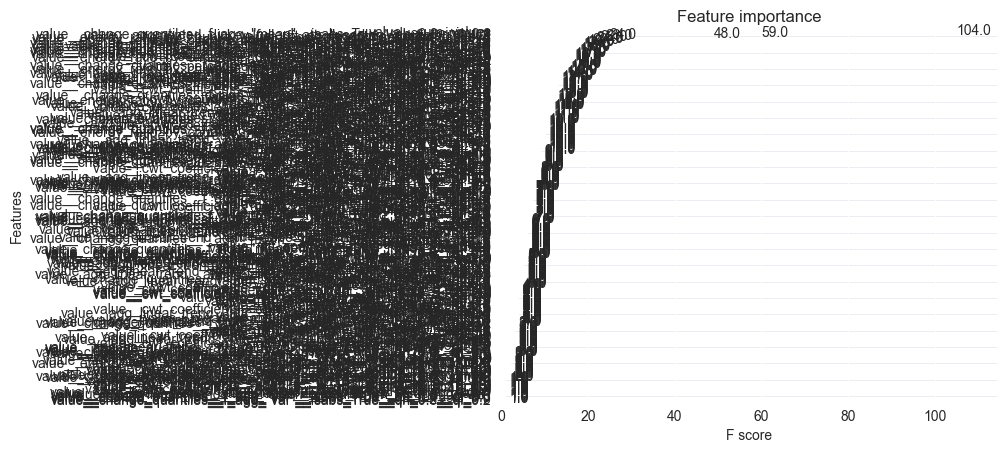

In [61]:
xgb.plot_importance(model)

In [68]:
param_ts_with_test = param_ts.copy()
param_ts_with_test["sym_test"] = y["sym_test"]

In [69]:
param_ts_with_test

,value__sum_values,"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.2","value__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4",...,"value__fft_coefficient__attr_""real""__coeff_21",value__quantile__q_0.6,value__percentage_of_reoccurring_values_to_all_values,"value__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)","value__linear_trend__attr_""intercept""",value__c3__lag_2,value__energy_ratio_by_chunks__num_segments_10__segment_focus_2,"value__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""mean""",sym_test
M1,2957630.0,410.336134,92196.525669,6.284248e+05,613.584071,252026.534967,1.245466e+06,826.831395,5.621455e+05,113253.027682,...,10253.753968,6516.00,0.324921,6446.791391,1751.613790,5051.521390,2.905267e+11,0.101200,5062.683539,False
M10,3567860.0,72.635659,2607.006790,3.518413e+04,97.989691,26694.412265,8.730481e+06,1328.798587,6.971386e+06,9080.957336,...,-7432.533493,8970.00,0.276515,9437.201896,-539.326273,8369.903218,1.019862e+12,0.079032,8396.036757,False
M100,480725.7,14.538144,359.433287,4.849553e+02,15.538255,293.026657,6.878272e+03,21.215049,6.428238e+03,278.889579,...,-14.507522,2009.46,0.020979,742.863085,0.479242,1968.217703,5.392683e+09,0.145176,1967.345898,False
M1000,876160.0,345.050505,110536.108560,4.195952e+05,458.095238,209815.419501,1.052168e+06,655.640000,6.224646e+05,46411.428571,...,-485.371458,3004.00,0.309322,2739.532248,-517.162587,3933.281333,3.717925e+10,0.281350,3916.919041,True
M10000,243270.0,118.500000,7922.750000,4.087384e+05,355.294118,287001.384083,8.165102e+05,508.979592,5.581112e+05,8725.000000,...,-4870.752969,3378.00,0.133333,3963.449340,-436.405900,4883.080745,5.275118e+10,0.106578,4765.657143,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9995,289980.0,179.090909,25744.628099,5.351665e+05,362.647059,428413.581315,7.761402e+05,496.000000,5.428480e+05,65955.555556,...,-1786.204160,4734.00,0.118644,5672.141061,-106.731086,6051.850932,8.915067e+10,0.142009,5886.285714,True
M9996,125750.0,92.272727,6490.289256,1.157416e+05,180.606061,88151.147842,5.189738e+05,365.200000,3.861410e+05,1881.632653,...,-2288.695884,1714.00,0.178571,2937.816558,64.873656,2444.625259,7.084457e+09,0.088846,2367.771429,True
M9997,119560.0,79.473684,4604.986150,8.226553e+04,164.687500,58706.152344,1.684150e+05,242.857143,1.102286e+05,2460.937500,...,-672.232453,1856.00,0.135593,1990.403925,225.154233,2338.766046,5.946419e+09,0.122254,2284.685714,True
M9998,184420.0,137.000000,13741.000000,2.114220e+05,260.789474,145117.797784,2.974526e+05,317.450980,2.003484e+05,24824.000000,...,-3822.009161,2908.00,0.078125,4539.185248,197.493910,4059.101449,2.427398e+10,0.092827,3934.571429,True


In [70]:
X_train, X_test, y_train, y_test = train_test_split(param_ts_with_test, y['smape'], test_size=0.2, random_state=42)

In [71]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [72]:
model1 = xgb.train(params, dtrain, num_round)

In [73]:
preds1 = model1.predict(dtest)

In [74]:
mse = sk.metrics.mean_squared_error(y_test, preds1)
smape_metric = smape(y_test, preds1)
rsquare = sk.metrics.r2_score(y_test, preds1)
print("Mean Squared Error: %.2f" % mse)
print("Symmetric Mean Absolute Percentage Error: %.2f" % smape_metric)
print("R-square: %.2f" % rsquare)


Mean Squared Error: 0.00
Symmetric Mean Absolute Percentage Error: 0.50
R-square: 0.63


In [75]:
input_file = "../src/M4-methods/Dataset/Train/Yearly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_y = pd.read_csv(output_file, index_col=0)
df_y

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V827,V828,V829,V830,V831,V832,V833,V834,V835,V836
V1,,,,,,,,,,,,,,,,,,,,,
Y1,5172.1,5133.5,5186.9,5084.6,5182.0,5414.3,5576.2,5752.9,5955.2,6087.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y2,2070.0,2104.0,2394.0,1651.0,1492.0,1348.0,1198.0,1192.0,1105.0,1008.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y3,2760.0,2980.0,3200.0,3450.0,3670.0,3850.0,4000.0,4160.0,4290.0,4530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y4,3380.0,3670.0,3960.0,4190.0,4440.0,4700.0,4890.0,5060.0,5200.0,5490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y5,1980.0,2030.0,2220.0,2530.0,2610.0,2720.0,2970.0,2980.0,3100.0,3230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y22996,470.0,500.0,572.0,572.0,609.0,664.0,795.0,841.0,927.0,951.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y22997,4660.0,4220.0,4790.0,8800.0,10600.0,25720.0,29860.0,23960.0,15220.0,12550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y22998,688.8,462.5,472.4,495.1,450.1,385.9,467.0,633.8,699.0,734.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_y.reset_index(inplace=True)
melted_df = pd.melt(df_y, id_vars='V1', var_name='time', value_name='value')
melted_df.rename(columns={'V1': 'id'}, inplace=True)
result_df = melted_df[['value', 'id', 'time']]
result_df = result_df.dropna(subset=['value'])
extracted_features = tf.extract_features(result_df, column_value="value", column_id="id", column_sort="time")
param_ts1 = extracted_features[feature.feature]
y1 = df_res.loc[df_res["V1"].str.startswith('Y')]
y1.index = y1["V1"]
y1 = y1.drop("V1", axis = 1)
dtest1 = xgb.DMatrix(param_ts1, label=y1['smape'])
predsY = model.predict(dtest1)
param_ts1_with_test = param_ts1.copy()
param_ts1_with_test['sym_test'] = y1['sym_test']
dtest2 = xgb.DMatrix(param_ts1_with_test, label=y1['smape'])
predsY1 = model1.predict(dtest2)
mse = sk.metrics.mean_squared_error(y1['smape'], predsY)
smape_metric = smape(y1['smape'], predsY)
rsquare = sk.metrics.r2_score(y1['smape'], predsY)
print("Mean Squared Error: %.2f" % mse)
print("Symmetric Mean Absolute Percentage Error: %.2f" % smape_metric)
print("R-square: %.2f" % rsquare)
mse = sk.metrics.mean_squared_error(y1['smape'], predsY1)
smape_metric = smape(y1['smape'], predsY1)
rsquare = sk.metrics.r2_score(y1['smape'], predsY1)
print("Mean Squared Error: %.2f" % mse)
print("Symmetric Mean Absolute Percentage Error: %.2f" % smape_metric)
print("R-square: %.2f" % rsquare)

Feature Extraction: 100%|██████████| 30/30 [04:02<00:00,  8.08s/it]


Mean Squared Error: 0.11
Symmetric Mean Absolute Percentage Error: 1.44
R-square: -10.41
Mean Squared Error: 0.10
Symmetric Mean Absolute Percentage Error: 1.44
R-square: -9.59
